# Lead Scoring 

## Logistic Regression

# CONTEXT
Problem: Lead Scoring Model

Selling something is not an easy task. A business might have many potential customers, commonly referred as leads, but not enough resources to cater them all. Even most of the leads won’t turn into actual bookings. So there is a need for a system that prioritises the leads, and sorts them on the basis of a score, referred to here as lead score. So whenever a new lead is generated, this system analyses the features of the lead and gives it a score that correlates with chances of it being converted into booking. Such ranking of potential customers not only helps in saving time but also helps in increasing the conversion rate by letting the sales team figure out what leads to spend time on. Here you have a dataset of leads with their set of features and their status. You have to build a ML model that predicts the lead score as an OUTPUT on the basis of the INPUT set of features. This lead score will range from 0-100, so more the lead score means more chances of conversion of lead to WON.

Steps should be:

Training ( on Y percent of data) Testing ( on (100-Y) percent of data) Evaluate the performance using metrics such as accuracy, precision, recall and F1-score.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Data Preparation

### Data Loading

In [2]:
data = pd.read_csv("E://projects//uniacco lead scorign model//Data_Science_Internship.csv", encoding= 'unicode_escape')
data.head(5)

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


### Data Inspection

In [3]:
print("There are", data.shape[0], "observation and", data.shape[1], "columns in the dataset")

There are 46608 observation and 16 columns in the dataset


In [4]:
data.columns = data.columns.str.strip()
data.columns

Index(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [5]:
#checking duplicates
data= data.drop_duplicates()
# No duplicate values

In [6]:
data.dtypes

Unnamed: 0         int64
Agent_id          object
status            object
lost_reason       object
budget            object
lease             object
movein            object
source            object
source_city       object
source_country    object
utm_source        object
utm_medium        object
des_city          object
des_country       object
room_type         object
lead_id           object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 6.0+ MB


In [8]:
data.describe()

,Unnamed: 0
count,46608.00000
mean,23303.50000
std,13454.71501
min,0.00000
25%,11651.75000
50%,23303.50000
75%,34955.25000
max,46607.00000


### Data Cleaning

In [9]:
data.isnull().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

### Status

In [10]:
data = data[(data['status'] == 'LOST') | (data['status'] == 'WON')]

In [11]:
#After dropping The leads with STATUS other than ‘WON’ or ‘LOST’ 
print("There are", data.shape[0], "observation and", data.shape[1], "columns in the dataset")

There are 46317 observation and 16 columns in the dataset


<AxesSubplot:xlabel='status', ylabel='count'>

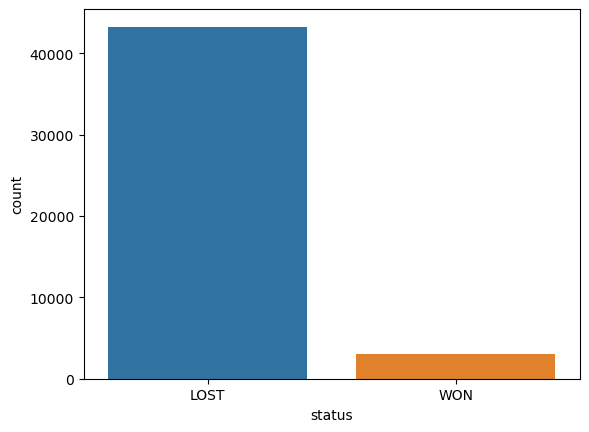

In [12]:
sns.countplot(data['status'])

### lost_reason

data['lost_reason'] = data['lost_reason'].replace(['Not responding','Just Enquiring', 'No supply','Junk lead/ Just Enquiring','Accomodation issue','Looking for admission','Not a student','Not going to university','Underage student','Guarantor issue','Looking for loan','Looking for Scholarship','Wants private accommodation','Booked on campus accommodation','Repeat lead'], 
                                              ['Not interested','Not interested', 'Supply issue','Junk lead','Doesnt fill student eligibility criteria','Doesnt fill student eligibility criteria','Doesnt fill student eligibility criteria','Doesnt fill student eligibility criteria','Doesnt fill student eligibility criteria','Loan/scholarship issue','Loan/scholarship issue','Loan/scholarship issue','Accomodation issue','Accomodation issue','Lead issue'])

In [13]:
len(data['lost_reason'])

46317

### budget

In [14]:
from itertools import repeat

In [15]:
data['lease'] = data['lease'].fillna('Null')

data['lease'] = data['lease'].replace(['Full Year Course Stay 40 - 44 weeks','Complete Education Year Stay 50 - 52 weeks','full-year-stay',
                                       'Academic year','FULL YEAR','51 weeks \\','51 weeks','51weeks','52 weeks','44 weeks','51Weeks','1 YEAR',
                                       '44 week s','Full time','Whole year','40 weekks','-51 weeks','52 WEEKS','51  weeks','12 month','51sweek',
                                       '48 weeks','44 week stay','44week','43/44 weeks','44weeks - 51','51 wweeks','45 weeksa','academic yr',
                                       '45 WEEKS','53 weeks','Full Year','40-44 weeks','44-51 weeeks','full year stay',
                                       '51 weeks ( I donÕt mind travelling over an hour)','41 weeks','45/week','Long time','51 cweeks','42 weeks',
                                       '44WEEKS','52 weeks]','44 weeks/51 weeks','full year stayt','1 year','51 Weeks','51WEEKS','44-51weeks',
                                       'Stay 50 - 52 weeks','1 year stay.','Full Year Course Stay 44- 51 weeks','52weeks','Full Year Stay',
                                       '51 weeks weeks','Full year','56 weeks','51-54weeks','academic year','44 week','Full Year Course Stay 51 weeks',
                                       'full year','44-51 weeks','Full year stay','44 - 51 weeks','full yyear stay','40weeks +','40 week',
                                       '1 year .','50 weeks','full course','45 weeks','44-52 weeks','44weeks','44 WEEKS','42-52 weeks','41weeks',
                                       '50 - 52 weeks','1year','46 weeks','full-course-stay','43 weeks', '6m to 1 year','40 - 44 weeks','51 week',
                                       '44 or 51 weeks', '51 WEEKS','44/51 weeks','40 weeks','46 week','12 months','1 year stay','8-12 m'
                                       ,'9-12 months','44/weeks','36-40 weeks', '11 months'],['44-52 weeks', '44-52 weeks', '44-52 weeks',
                                        '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', 
                                       '44-52 weeks','44-52 weeks','44-52 weeks', '44-52 weeks', '44-52 weeks','44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks', '44-52 weeks'])
                                                  

data['lease'] = data['lease'].replace(['24-44weeks','38 weeks','24 weeks','39 week','34 weeks','36-38 weeks','38-44 weeks','38 Weeks', '24-48 weeks',
                                                    '6 months (26 weeks)','semester stay','semester-stay','Sem Stay','6 months',
                                                   '6months','Semester Stay 20 - 24 weeks','Semester stay','sem stay',
                                                   'Semester Stay','Sem stay','35 weeks','6-8 months','7-8 months','10 month','9 months','39 weeks',
                                                   '6 motnhs','25-30 weeks','6  onths','30 weeks','6 month','06 months','24-44 weeks','8months','35 weeks'
                                                   '24 weeks'],['24-44 weeks','24-44 weeks','24-44 weeks','24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks', '24-44 weeks'])

data['lease'] = data['lease'].replace(['Summer/Short Stay 8 - 12 weeks','Short stay','short-stay','short stay','Short stay'
                                                    '2 months','1-2 months','1 weeks','2 month', '3-5 months', '3 weeks','12 weeks max', '23 weeks',
                                                   '3months','10weeks','19 weeks','3-4 weeks', '8 weeks','20 - 24 weeks','15 weeks',
                                                   '5 weeks','6 weeks','3 month','3 months','2 weeks','4-8 weeks','4 weeks','10-15 weeks','1 mnth' 
                                                   ,'22 weeks','5-6 weeks','2 -3weeks', '3-4 months','20weeks', '1 month\\','6weeks','20 weeks',
                                                   '1 week','03 months','8-12 weeks','17 weeks','7 days', '4 months','12 weeks','16 weeks','4 WEEKS',
                                                   '5 months', '14 weeks','1 month','10 months','10 weeks','5-6 months','2-3 months','16 week','1 - 2 months'],['<24 weeks','<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks','<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks','<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks', '<24 weeks'])

data['lease'] = data['lease'].replace(['0','51','44', '18','12', '96', '43', '20', '294', '48', '40', 'N51', '6','London',
                                       'long tearm', 'ASAP','Glasgow','till december','Other','other','lease','Until June 2023',
                                       'Until august', 'until dec', '33 weeks',
                                       '8', '84', '45', '39', '1', '50', '12-24', '25', '19', '44-51',
                                       '24-36', '32', '44/week', '42', '24', '2 years', '10', '52', '46',
                                       '13', '4', '69', '16', '3', '11', '40-44', '26', '51\\', '36 - 44',
                                       '140', '41', '56', '<=8', '21', '2', '350', '47', '38', '54', '37',
                                       '30', '15', '22', '17', '5', '500-550pm', '12m', '36', 'not sure','49', '23', '34',
                                       '357', '3 years', '55', '207', '35', '14', '61',
                                       '88', 'N/44', '156', 'aug', '97', '76', '31', '125/week', '60',
                                       '1-2', '44 - 51', '-', '45 or more', '27', '0.5', '9', '28', '72',
                                       '33', '2years', '250', '130/week', '68', '130', '29', '58',
                                       '160/week', '12-16', '16 days', '150', '2 months', '44-', '143',
                                       '144', '57', '40+', '129', '42-51', '70', '189', '89', '200/week','78'],['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other','Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other','Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'])

We have seen that many columns are not adding any information to the model, hence we can drop them for further analysis.
We will also drop Budget columns since it has approx 50 % null values

In [16]:
data = data.drop(['Unnamed: 0','Agent_id','source','budget','source_city','source_country','utm_source','utm_medium','des_city','des_country','lead_id'],axis = 1)
data.head(5)

,status,lost_reason,lease,movein,room_type
0,LOST,Not responding,Null,NaN,NaN
1,LOST,Low budget,Null,NaN,NaN
2,LOST,Not responding,Full Year Course Stay 40 - 44 weeks,31-08-22,Ensuite
3,LOST,Low budget,0,NaN,NaN
4,LOST,Junk lead,Null,NaN,NaN


### Replacing missing values with 'Null'

In [17]:
#replacing '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' with 'Null'
#data = data.replace(['9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0'],['Null'])
#data= data.replace(np.nan, 'Null')

In [18]:
data = data[(data['status'] == 'LOST') | (data['status'] == 'WON')]

In [19]:
data.dtypes

status         object
lost_reason    object
lease          object
movein         object
room_type      object
dtype: object

In [20]:
#unique values in every column
for col in data.columns:
    print('{}: {}'.format(col,len(data[col].unique())))

status: 2
lost_reason: 31
lease: 312
movein: 470
room_type: 6


#### Converting some binary variables (Yes/No) to 1/0

In [21]:
# List of variables to map

varlist =  ['status']

# Defining the map function
def binary_map(x):
    return x.map({'WON': 1, 'LOST': 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [22]:
data['status'].unique()

array([0, 1], dtype=int64)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [23]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['lost_reason','lease','movein','room_type']], drop_first=True)
dummy1.head()

,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,lost_reason_Just Enquiring,lost_reason_Lead issue,lost_reason_Looking for Scholarship,lost_reason_Looking for admission,lost_reason_Looking for loan,lost_reason_Low availability,lost_reason_Low budget,lost_reason_No supply,lost_reason_Not a student,lost_reason_Not going to university,lost_reason_Not interested,lost_reason_Not responding,lost_reason_Not serving in that region,lost_reason_Repeat lead,lost_reason_Semester stay,lost_reason_Short stay,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,lease_-51 weeks,lease_0,lease_0.5,lease_03 months,lease_06 months,lease_1,lease_1 - 2 months,lease_1 YEAR,lease_1 mnth,lease_1 month,lease_1 month\,lease_1 week,lease_1 weeks,lease_1 year,lease_1 year .,lease_1 year stay,lease_1 year stay.,lease_1-2,lease_1-2 months,lease_10,lease_10 month,...,movein_29-05-21,movein_29-06-23,movein_29-06-24,movein_29-07-22,movein_29-07-23,movein_29-08-20,movein_29-08-22,movein_29-08-23,movein_29-09-22,movein_29-09-23,movein_29-10-22,movein_29-11-22,movein_29-12-22,movein_29-12-23,movein_30-01-21,movein_30-01-22,movein_30-01-23,movein_30-01-24,movein_30-03-23,movein_30-04-23,movein_30-04-24,movein_30-05-23,movein_30-06-22,movein_30-06-23,movein_30-07-22,movein_30-07-23,movein_30-08-22,movein_30-08-23,movein_30-09-22,movein_30-09-23,movein_30-10-22,movein_30-11-22,movein_30-11-23,movein_30-12-22,movein_31-01-23,movein_31-03-23,movein_31-05-23,movein_31-05-24,movein_31-07-22,movein_31-07-23,movein_31-08-22,movein_31-08-23,movein_31-10-22,movein_31-10-23,movein_31-12-22,movein_31-12-23,room_type_Entire Place,room_type_Non-Ensuite,room_type_Studio,room_type_Twin-Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Adding the results to the master dataframe
data1 = pd.concat([data, dummy1], axis=1)
data1.head()

,status,lost_reason,lease,movein,room_type,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,lost_reason_Just Enquiring,lost_reason_Lead issue,lost_reason_Looking for Scholarship,lost_reason_Looking for admission,lost_reason_Looking for loan,lost_reason_Low availability,lost_reason_Low budget,lost_reason_No supply,lost_reason_Not a student,lost_reason_Not going to university,lost_reason_Not interested,lost_reason_Not responding,lost_reason_Not serving in that region,lost_reason_Repeat lead,lost_reason_Semester stay,lost_reason_Short stay,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,lease_-51 weeks,lease_0,lease_0.5,lease_03 months,lease_06 months,lease_1,lease_1 - 2 months,lease_1 YEAR,lease_1 mnth,lease_1 month,lease_1 month\,lease_1 week,lease_1 weeks,lease_1 year,lease_1 year .,lease_1 year stay,...,movein_29-05-21,movein_29-06-23,movein_29-06-24,movein_29-07-22,movein_29-07-23,movein_29-08-20,movein_29-08-22,movein_29-08-23,movein_29-09-22,movein_29-09-23,movein_29-10-22,movein_29-11-22,movein_29-12-22,movein_29-12-23,movein_30-01-21,movein_30-01-22,movein_30-01-23,movein_30-01-24,movein_30-03-23,movein_30-04-23,movein_30-04-24,movein_30-05-23,movein_30-06-22,movein_30-06-23,movein_30-07-22,movein_30-07-23,movein_30-08-22,movein_30-08-23,movein_30-09-22,movein_30-09-23,movein_30-10-22,movein_30-11-22,movein_30-11-23,movein_30-12-22,movein_31-01-23,movein_31-03-23,movein_31-05-23,movein_31-05-24,movein_31-07-22,movein_31-07-23,movein_31-08-22,movein_31-08-23,movein_31-10-22,movein_31-10-23,movein_31-12-22,movein_31-12-23,room_type_Entire Place,room_type_Non-Ensuite,room_type_Studio,room_type_Twin-Studio
0,0,Not responding,Null,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Low budget,Null,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Not responding,Full Year Course Stay 40 - 44 weeks,31-08-22,Ensuite,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,Low budget,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,Junk lead,Null,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
data1 = data1.drop(['lost_reason','lease','movein','room_type'], axis = 1)

In [26]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data1.drop(['status'], axis=1)

In [27]:
X.head()

,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,lost_reason_Just Enquiring,lost_reason_Lead issue,lost_reason_Looking for Scholarship,lost_reason_Looking for admission,lost_reason_Looking for loan,lost_reason_Low availability,lost_reason_Low budget,lost_reason_No supply,lost_reason_Not a student,lost_reason_Not going to university,lost_reason_Not interested,lost_reason_Not responding,lost_reason_Not serving in that region,lost_reason_Repeat lead,lost_reason_Semester stay,lost_reason_Short stay,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,lease_-51 weeks,lease_0,lease_0.5,lease_03 months,lease_06 months,lease_1,lease_1 - 2 months,lease_1 YEAR,lease_1 mnth,lease_1 month,lease_1 month\,lease_1 week,lease_1 weeks,lease_1 year,lease_1 year .,lease_1 year stay,lease_1 year stay.,lease_1-2,lease_1-2 months,lease_10,lease_10 month,...,movein_29-05-21,movein_29-06-23,movein_29-06-24,movein_29-07-22,movein_29-07-23,movein_29-08-20,movein_29-08-22,movein_29-08-23,movein_29-09-22,movein_29-09-23,movein_29-10-22,movein_29-11-22,movein_29-12-22,movein_29-12-23,movein_30-01-21,movein_30-01-22,movein_30-01-23,movein_30-01-24,movein_30-03-23,movein_30-04-23,movein_30-04-24,movein_30-05-23,movein_30-06-22,movein_30-06-23,movein_30-07-22,movein_30-07-23,movein_30-08-22,movein_30-08-23,movein_30-09-22,movein_30-09-23,movein_30-10-22,movein_30-11-22,movein_30-11-23,movein_30-12-22,movein_31-01-23,movein_31-03-23,movein_31-05-23,movein_31-05-24,movein_31-07-22,movein_31-07-23,movein_31-08-22,movein_31-08-23,movein_31-10-22,movein_31-10-23,movein_31-12-22,movein_31-12-23,room_type_Entire Place,room_type_Non-Ensuite,room_type_Studio,room_type_Twin-Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# Putting response variable to y
y = data1['status']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: status, dtype: int64

In [29]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [30]:
X.dtypes.unique()

array([dtype('uint8')], dtype=object)

### Step 5: Feature Scaling

In [31]:
# Checking the Churn Rate
churn_rate = (sum(data1['status'])/len(data['status'].index))*100
churn_rate

6.634712956365914

We have almost 6.63% conversion

### Model Building

#### Running Your First Training Model

In [32]:
import statsmodels.api as sm

In [33]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32421
Model:                            GLM   Df Residuals:                    31700
Model Family:                Binomial   Df Model:                          720
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 17 Feb 2023   Deviance:                       37394.
Time:                        02:46:18   Pearson chi2:                 1.83e+18
No. Iterations:                    85   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                    1.14e+15   6.72e+07    1.7e+07      0.000    1.14e+15    1.14e+15
lost_reason_Booked with competitor                     -6.015e+15   4.52e+06  -1.33e+09      0.000   -6.01e+15   -6.01e+15
lost_reason_Booked with manager                         -2.48e+15   3.39e+06  -7.31e+08      0.000   -2.48e+15   -2.48e+15
lost_reason_Cross sell                                  -5.67e+15   6.94e+07  -8.18e+07      0.000   -5.67e+15   -5.67e+15
lost_reason_Didn't respond in time                     -2.864e+15   1.59e+07   -1.8e+08      0.000   -2.86e+15   -2.86e+15
lost_reason_Distance issue                             -6.055e+15   5.81e+06  -1.04e+09      0.000   -6.05e+15   -6.05e+15
lost_reason_Guarantor issue                            -2.416e+15   1.95e+07  -1.24e+08      0.000   -2.42e+15   -2.42e+15
lost_reason_Inadequate details                         -2.618e+15   3.12e+06  -8.39e+08      0.000   -2.62e+15   -2.62e+15
lost_reason_Junk lead                                  -5.946e+15   3.52e+06  -1.69e+09      0.000   -5.95e+15   -5.95e+15
lost_reason_Junk lead/ Just Enquiring                  -3.647e+15   7.17e+06  -5.09e+08      0.000   -3.65e+15   -3.65e+15
lost_reason_Just Enquiring                             -6.064e+15   2.77e+06  -2.19e+09      0.000   -6.06e+15   -6.06e+15
lost_reason_Lead issue                                 -5.933e+15    7.6e+06  -7.81e+08      0.000   -5.93e+15   -5.93e+15
lost_reason_Looking for Scholarship                    -6.336e+15   3.88e+07  -1.63e+08      0.000   -6.34e+15   -6.34e+15
lost_reason_Looking for admission                      -6.097e+15   1.36e+07   -4.5e+08      0.000    -6.1e+15    -6.1e+15
lost_reason_Looking for loan                           -4.357e+15   4.75e+07  -9.18e+07      0.000   -4.36e+15   -4.36e+15
lost_reason_Low availability                           -2.362e+15   1.65e+06  -1.44e+09      0.000   -2.36e+15   -2.36e+15
lost_reason_Low budget                                 -5.736e+15   1.76e+06  -3.26e+09      0.000   -5.74e+15   -5.74e+15
lost_reason_No supply                                  -5.145e+15   3.76e+06  -1.37e+09      0.000   -5.14e+15   -5.14e+15
lost_reason_Not a student                              -6.006e+15   2.49e+06  -2.41e+09      0.000   -6.01e+15   -6.01e+15
lost_reason_Not going to university                    -5.977e+15   4.61e+06   -1.3e+09      0.000   -5.98e+15   -5.98e+15
lost_reason_Not interested                             -2.457e+15   1.69e+06  -1.46e+09      0.000   -2.46e+15   -2.46e+15
lost_reason_Not responding                             -5.008e+15   1.65e+06  -3.04e+09      0.000   -5.01e+15   -5.01e+15
lost_rea

### Feature Selection Using RFE

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [35]:
from sklearn.feature_selection import RFE


In [36]:
# running RFE with 15 variables as output
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=40)

In [37]:
rfe = rfe.fit(X_train, y_train)

In [38]:
rfe.support_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [39]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('lost_reason_Booked with competitor', True, 1),
 ('lost_reason_Booked with manager', True, 1),
 ('lost_reason_Cross sell', False, 27),
 ("lost_reason_Didn't respond in time", True, 1),
 ('lost_reason_Distance issue', True, 1),
 ('lost_reason_Guarantor issue', True, 1),
 ('lost_reason_Inadequate details', True, 1),
 ('lost_reason_Junk lead', True, 1),
 ('lost_reason_Junk lead/ Just Enquiring', True, 1),
 ('lost_reason_Just Enquiring', True, 1),
 ('lost_reason_Lead issue', True, 1),
 ('lost_reason_Looking for Scholarship', True, 1),
 ('lost_reason_Looking for admission', True, 1),
 ('lost_reason_Looking for loan', True, 1),
 ('lost_reason_Low availability', True, 1),
 ('lost_reason_Low budget', True, 1),
 ('lost_reason_No supply', True, 1),
 ('lost_reason_Not a student', True, 1),
 ('lost_reason_Not going to university', True, 1),
 ('lost_reason_Not interested', True, 1),
 ('lost_reason_Not responding', True, 1),
 ('lost_reason_Not serving in that region', True, 1),
 ('lost_reason_Repe

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['lost_reason_Booked with competitor', 'lost_reason_Booked with manager',
       'lost_reason_Didn't respond in time', 'lost_reason_Distance issue',
       'lost_reason_Guarantor issue', 'lost_reason_Inadequate details',
       'lost_reason_Junk lead', 'lost_reason_Junk lead/ Just Enquiring',
       'lost_reason_Just Enquiring', 'lost_reason_Lead issue',
       'lost_reason_Looking for Scholarship',
       'lost_reason_Looking for admission', 'lost_reason_Looking for loan',
       'lost_reason_Low availability', 'lost_reason_Low budget',
       'lost_reason_No supply', 'lost_reason_Not a student',
       'lost_reason_Not going to university', 'lost_reason_Not interested',
       'lost_reason_Not responding', 'lost_reason_Not serving in that region',
       'lost_reason_Repeat lead', 'lost_reason_Semester stay',
       'lost_reason_Short stay', 'lost_reason_Supply issue',
       'lost_reason_Visa/admission denied',
       'lost_reason_Wants private accommodation', 'lease_12-24', '

In [41]:
X_train.columns[~rfe.support_]

Index(['lost_reason_Cross sell', 'lost_reason_Underage student',
       'lease_-51 weeks', 'lease_0', 'lease_0.5', 'lease_03 months',
       'lease_06 months', 'lease_1', 'lease_1 - 2 months', 'lease_1 YEAR',
       ...
       'movein_31-08-22', 'movein_31-08-23', 'movein_31-10-22',
       'movein_31-10-23', 'movein_31-12-22', 'movein_31-12-23',
       'room_type_Entire Place', 'room_type_Non-Ensuite', 'room_type_Studio',
       'room_type_Twin-Studio'],
      dtype='object', length=772)

##### Assessing the model with StatsModels

In [42]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32421
Model:                            GLM   Df Residuals:                    32380
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1083.8
Date:                Fri, 17 Feb 2023   Deviance:                       2167.6
Time:                        03:07:04   Pearson chi2:                 2.53e+03
No. Iterations:                    30   Pseudo R-squ. (CS):             0.3438
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.3856      0.060     22.956      0.000       1.267       1.504
lost_reason_Booked with competitor        -50.8619   2.31e+05     -0.000      1.000   -4.52e+05    4.52e+05
lost_reason_Booked with manager           -51.2243   1.71e+05     -0.000      1.000   -3.35e+05    3.35e+05
lost_reason_Didn't respond in time        -33.4183   1.01e+06  -3.32e-05      1.000   -1.97e+06    1.97e+06
lost_reason_Distance issue                -50.0936   2.99e+05     -0.000      1.000   -5.87e+05    5.87e+05
lost_reason_Guarantor issue               -33.4904   1.23e+06  -2.73e-05      1.000    -2.4e+06     2.4e+06
lost_reason_Inadequate details            -50.4106   1.51e+05     -0.000      1.000   -2.96e+05    2.96e+05
lost_reason_Junk lead                     -33.1662   2.04e+05     -0.000      1.000      -4e+05       4e+05
lost_reason_Junk lead/ Just Enquiring     -33.2136   4.27e+05  -7.78e-05      1.000   -8.37e+05    8.37e+05
lost_reason_Just Enquiring                -50.2400   1.24e+05     -0.000      1.000   -2.43e+05    2.43e+05
lost_reason_Lead issue                    -33.1708   4.58e+05  -7.25e-05      1.000   -8.97e+05    8.97e+05
lost_reason_Looking for Scholarship       -32.9517    2.5e+06  -1.32e-05      1.000   -4.91e+06    4.91e+06
lost_reason_Looking for admission         -33.3052   8.54e+05   -3.9e-05      1.000   -1.67e+06    1.67e+06
lost_reason_Looking for loan              -32.9517   3.07e+06  -1.07e-05      1.000   -6.01e+06    6.01e+06
lost_reason_Low availability              -50.8178   5.26e+04     -0.001      0.999   -1.03e+05    1.03e+05
lost_reason_Low budget                    -69.4270   6.98e+04     -0.001      0.999   -1.37e+05    1.37e+05
lost_reason_No supply                     -33.0534   2.21e+05     -0.000      1.000   -4.33e+05    4.32e+05
lost_reason_Not a student                 -50.6912   1.12e+05     -0.000      1.000    -2.2e+05     2.2e+05
lost_reason_Not going to university       -50.4631   2.32e+05     -0.000      1.000   -4.55e+05    4.55e+05
lost_reason_Not interested                -50.2264   5.68e+04     -0.001      0.999   -1.11e+05    1.11e+05
lost_reason_Not responding                -49.3584   5.26e+04     -0.001      0.999   -1.03e+05    1.03e+05
lost_reason_Not serving in that region    -50.4586   2.17e+05     -0.000      1.000   -4.26e+05    4.26e+05
lost_reason_Repeat lead                   -33.1640   2.63e+05     -0.000      1.000   -5.15e+05    5.15e+05
lost_reason_Semester stay                 -50.6286   1.54e+05     -0.000      1.000   -3.02e+05    3.02e+05
lost_reason_Short stay                    -50.9416   9.49e+04     -0.001      1.000   -1.86e+05    1.86e+05
lost_reason_Supply issue                  -49.4503   1.85e+

In [43]:
col1 = col.drop(['lost_reason_Booked with manager','lost_reason_Inadequate details','lost_reason_Junk lead','lost_reason_Just Enquiring','lost_reason_Low availability','lost_reason_Low budget','lost_reason_No supply','lost_reason_Not a student','lost_reason_Not interested','lost_reason_Not responding','lost_reason_Not serving in that region','lost_reason_Semester stay','lost_reason_Short stay','lost_reason_Supply issue','lost_reason_Wants private accommodation'])
col1

Index(['lost_reason_Booked with competitor',
       'lost_reason_Didn't respond in time', 'lost_reason_Distance issue',
       'lost_reason_Guarantor issue', 'lost_reason_Junk lead/ Just Enquiring',
       'lost_reason_Lead issue', 'lost_reason_Looking for Scholarship',
       'lost_reason_Looking for admission', 'lost_reason_Looking for loan',
       'lost_reason_Not going to university', 'lost_reason_Repeat lead',
       'lost_reason_Visa/admission denied', 'lease_12-24', 'lease_39',
       'lease_44', 'lease_44 - 51', 'lease_45', 'lease_48', 'lease_51',
       'movein_03-01-23', 'movein_09-09-22', 'movein_11-07-22',
       'movein_19-08-22', 'movein_21-09-22', 'movein_25-09-22'],
      dtype='object')

In [44]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32421
Model:                            GLM   Df Residuals:                    32395
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7441.4
Date:                Fri, 17 Feb 2023   Deviance:                       14883.
Time:                        03:07:05   Pearson chi2:                 3.12e+04
No. Iterations:                    26   Pseudo R-squ. (CS):            0.02870
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9003      0.028   -104.935      0.000      -2.954      -2.846
lost_reason_Booked with competitor      -25.0499   3.63e+04     -0.001      0.999   -7.11e+04     7.1e+04
lost_reason_Didn't respond in time      -25.1773   1.33e+05     -0.000      1.000   -2.61e+05    2.61e+05
lost_reason_Distance issue              -24.9439    4.8e+04     -0.001      1.000   -9.42e+04    9.41e+04
lost_reason_Guarantor issue             -25.3967   1.59e+05     -0.000      1.000   -3.11e+05    3.11e+05
lost_reason_Junk lead/ Just Enquiring   -25.0030   5.68e+04     -0.000      1.000   -1.11e+05    1.11e+05
lost_reason_Lead issue                  -24.8416   6.17e+04     -0.000      1.000   -1.21e+05    1.21e+05
lost_reason_Looking for Scholarship     -24.6658   3.39e+05  -7.28e-05      1.000   -6.64e+05    6.64e+05
lost_reason_Looking for admission       -24.9719   1.15e+05     -0.000      1.000   -2.25e+05    2.25e+05
lost_reason_Looking for loan            -24.6658   4.15e+05  -5.94e-05      1.000   -8.14e+05    8.14e+05
lost_reason_Not going to university     -25.1026   3.67e+04     -0.001      0.999    -7.2e+04    7.19e+04
lost_reason_Repeat lead                 -24.8740   3.54e+04     -0.001      0.999   -6.93e+04    6.93e+04
lost_reason_Visa/admission denied       -25.0722    1.9e+05     -0.000      1.000   -3.73e+05    3.73e+05
lease_12-24                               1.4998      0.399      3.761      0.000       0.718       2.282
lease_39                                  1.2630      0.414      3.051      0.002       0.452       2.074
lease_44                                  1.8967      0.097     19.563      0.000       1.707       2.087
lease_44 - 51                           -24.6658   2.63e+05  -9.39e-05      1.000   -5.15e+05    5.15e+05
lease_45                                  2.4914      0.207     12.057      0.000       2.086       2.896
lease_48                                  1.3162      0.389      3.383      0.001       0.554       2.079
lease_51                                  1.2928      0.059     22.004      0.000       1.178       1.408
movein_03-01-23                         -24.6658   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
movein_09-09-22                           0.5443      0.104      5.228      0.000       0.340       0.748
movein_11-07-22                         -24.6658   1.57e+05     -0.000      1.000   -3.08e+05    3.08e+05
movein_19-08-22                           0.7019      0.343      2.048      0.041       0.030       1.373
movein_21-09-22                          -0.3297      0.342     -0.963      0.336      -1.001       0.341
movein_25-09-22                          -0.0149      0.252     -0.059      0.953      -0.509       0.479
=========

In [45]:
col2= col1.drop(['lost_reason_Booked with competitor','lost_reason_Distance issue','lost_reason_Guarantor issue','lost_reason_Junk lead/ Just Enquiring','lost_reason_Lead issue','lost_reason_Looking for Scholarship','lost_reason_Looking for admission','lost_reason_Looking for loan','lost_reason_Not going to university','lost_reason_Repeat lead','lost_reason_Visa/admission denied','movein_03-01-23','movein_11-07-22'])
col2

Index(['lost_reason_Didn't respond in time', 'lease_12-24', 'lease_39',
       'lease_44', 'lease_44 - 51', 'lease_45', 'lease_48', 'lease_51',
       'movein_09-09-22', 'movein_19-08-22', 'movein_21-09-22',
       'movein_25-09-22'],
      dtype='object')

In [46]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32421
Model:                            GLM   Df Residuals:                    32408
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7527.0
Date:                Fri, 17 Feb 2023   Deviance:                       15054.
Time:                        03:07:06   Pearson chi2:                 3.24e+04
No. Iterations:                    22   Pseudo R-squ. (CS):            0.02356
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -2.9386      0.028   -106.406      0.000      -2.993      -2.884
lost_reason_Didn't respond in time   -21.1334   1.81e+04     -0.001      0.999   -3.54e+04    3.54e+04
lease_12-24                            1.5062      0.398      3.789      0.000       0.727       2.285
lease_39                               1.2739      0.413      3.084      0.002       0.464       2.084
lease_44                               1.8935      0.096     19.633      0.000       1.705       2.083
lease_44 - 51                        -20.6275   3.55e+04     -0.001      1.000   -6.97e+04    6.96e+04
lease_45                               2.4585      0.204     12.053      0.000       2.059       2.858
lease_48                               1.3291      0.388      3.423      0.001       0.568       2.090
lease_51                               1.2745      0.059     21.773      0.000       1.160       1.389
movein_09-09-22                        0.5519      0.104      5.311      0.000       0.348       0.756
movein_19-08-22                        0.7187      0.342      2.102      0.036       0.049       1.389
movein_21-09-22                       -0.3295      0.342     -0.964      0.335      -1.000       0.341
movein_25-09-22                       -0.0138      0.252     -0.055      0.956      -0.507       0.480
======================================================================================================
"""

In [47]:
col3= col2.drop(["lost_reason_Didn't respond in time","lease_44 - 51"])
col3

Index(['lease_12-24', 'lease_39', 'lease_44', 'lease_45', 'lease_48',
       'lease_51', 'movein_09-09-22', 'movein_19-08-22', 'movein_21-09-22',
       'movein_25-09-22'],
      dtype='object')

In [48]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32421
Model:                            GLM   Df Residuals:                    32410
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7528.8
Date:                Fri, 17 Feb 2023   Deviance:                       15058.
Time:                        03:07:06   Pearson chi2:                 3.24e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.02345
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.9393      0.028   -106.433      0.000      -2.993      -2.885
lease_12-24         1.5069      0.398      3.790      0.000       0.728       2.286
lease_39            1.2746      0.413      3.085      0.002       0.465       2.084
lease_44            1.8920      0.096     19.623      0.000       1.703       2.081
lease_45            2.4593      0.204     12.056      0.000       2.059       2.859
lease_48            1.3298      0.388      3.425      0.001       0.569       2.091
lease_51            1.2739      0.059     21.765      0.000       1.159       1.389
movein_09-09-22     0.5519      0.104      5.311      0.000       0.348       0.756
movein_19-08-22     0.7195      0.342      2.105      0.035       0.049       1.390
movein_21-09-22    -0.3287      0.342     -0.961      0.336      -0.999       0.341
movein_25-09-22    -0.0131      0.252     -0.052      0.959      -0.507       0.481
===================================================================================
"""

In [49]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

43527    0.050246
33863    0.050246
13602    0.050246
38891    0.050246
44728    0.050246
11419    0.050246
30612    0.159040
19413    0.159040
25255    0.050246
30000    0.050246
dtype: float64

In [50]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05024587, 0.05024587, 0.05024587, 0.05024587, 0.05024587,
       0.05024587, 0.15903971, 0.15903971, 0.05024587, 0.05024587])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [51]:
y_train_pred_final = pd.DataFrame({'status':y_train.values, 'status_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,status,status_prob,Prospect ID
0,0,0.050246,43527
1,0,0.050246,33863
2,1,0.050246,13602
3,0,0.050246,38891
4,0,0.050246,44728


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [52]:
y_train_pred_final['predicted'] = y_train_pred_final.status_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,status,status_prob,Prospect ID,predicted
0,0,0.050246,43527,0
1,0,0.050246,33863,0
2,1,0.050246,13602,0
3,0,0.050246,38891,0
4,0,0.050246,44728,0


In [53]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.status, y_train_pred_final.predicted )
print(confusion)

[[30265     5]
 [ 2144     7]]


In [54]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.status, y_train_pred_final.predicted))

0.9337158014866908


#### Checking VIFs

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,lease_12-24,1.00
2,lease_44,1.00
3,lease_45,1.00
4,lease_48,1.00
7,movein_19-08-22,1.00
9,movein_25-09-22,1.00
1,lease_39,0.46
6,movein_09-09-22,0.42
5,lease_51,0.14
8,movein_21-09-22,0.12


## Metrics beyond simply accuracy

In [57]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [58]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.0032543003254300326

In [59]:
# Let us calculate specificity
TN / float(TN+FP)

0.9998348199537496

In [60]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.00016518004625041294


In [61]:
# positive predictive value 
print (TP / float(TP+FP))

0.5833333333333334


In [62]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9338455367336234


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [63]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [64]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.status, y_train_pred_final.status_prob, drop_intermediate = False )

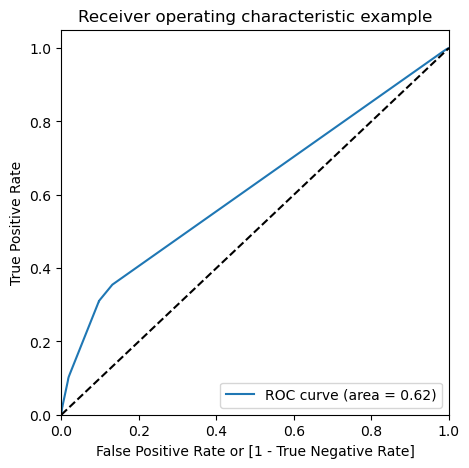

In [65]:
draw_roc(y_train_pred_final.status, y_train_pred_final.status_prob)

### Step 10: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [66]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.status_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,status,status_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.050246,43527,0,1,0,0,0,0,0,0,0,0,0
1,0,0.050246,33863,0,1,0,0,0,0,0,0,0,0,0
2,1,0.050246,13602,0,1,0,0,0,0,0,0,0,0,0
3,0,0.050246,38891,0,1,0,0,0,0,0,0,0,0,0
4,0,0.050246,44728,0,1,0,0,0,0,0,0,0,0,0


In [67]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.status, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.066346  1.000000  0.000000
0.1   0.1  0.863792  0.309623  0.903171
0.2   0.2  0.923599  0.099024  0.982194
0.3   0.3  0.932729  0.022780  0.997390
0.4   0.4  0.933747  0.003719  0.999835
0.5   0.5  0.933716  0.003254  0.999835
0.6   0.6  0.933654  0.000000  1.000000
0.7   0.7  0.933654  0.000000  1.000000
0.8   0.8  0.933654  0.000000  1.000000
0.9   0.9  0.933654  0.000000  1.000000


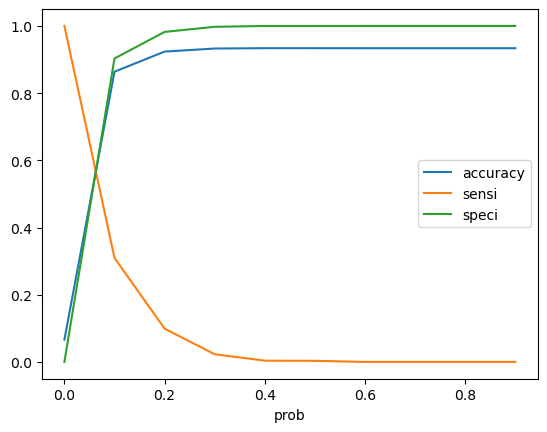

In [68]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [69]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.status_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,status,status_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.050246,43527,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.050246,33863,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.050246,13602,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.050246,38891,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.050246,44728,0,1,0,0,0,0,0,0,0,0,0,0


### Assigning Lead Score

In [70]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.status_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,status,status_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.050246,43527,0,1,0,0,0,0,0,0,0,0,0,0,5
1,0,0.050246,33863,0,1,0,0,0,0,0,0,0,0,0,0,5
2,1,0.050246,13602,0,1,0,0,0,0,0,0,0,0,0,0,5
3,0,0.050246,38891,0,1,0,0,0,0,0,0,0,0,0,0,5
4,0,0.050246,44728,0,1,0,0,0,0,0,0,0,0,0,0,5


In [71]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.status, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.status, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [72]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.09902370990237098

In [73]:
# Let us calculate specificity
TN / float(TN+FP)

0.9821935910142054

In [74]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.017806408985794515


In [75]:
# Positive predictive value 
print (TP / float(TP+FP))

0.28324468085106386


In [76]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9388045091414317


## Precision and Recall

In [77]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.status, y_train_pred_final.predicted )
confusion

array([[30265,     5],
       [ 2144,     7]], dtype=int64)

In [78]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.5833333333333334

In [79]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.0032543003254300326

Using sklearn utilities for the same

In [80]:
from sklearn.metrics import precision_score, recall_score

In [81]:
precision_score(y_train_pred_final.status , y_train_pred_final.predicted)

0.5833333333333334

In [82]:
recall_score(y_train_pred_final.status, y_train_pred_final.predicted)

0.0032543003254300326

### Precision and recall tradeoff

In [83]:
from sklearn.metrics import precision_recall_curve

In [84]:
y_train_pred_final.status, y_train_pred_final.predicted

(0        0
 1        0
 2        1
 3        0
 4        0
         ..
 32416    0
 32417    0
 32418    0
 32419    0
 32420    1
 Name: status, Length: 32421, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 32416    0
 32417    0
 32418    0
 32419    0
 32420    0
 Name: predicted, Length: 32421, dtype: int64)

In [85]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.status, y_train_pred_final.status_prob)

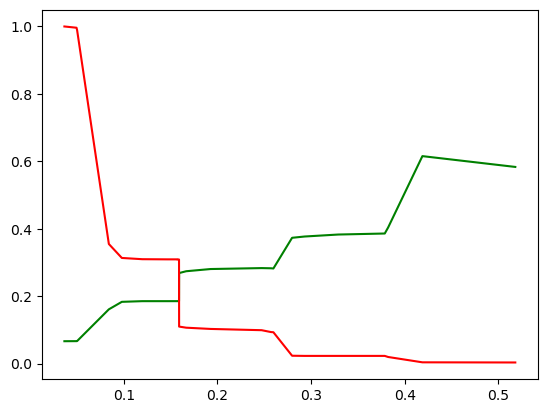

In [86]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [87]:
X_test = X_test[col3]
X_test.head()

,lease_12-24,lease_39,lease_44,lease_45,lease_48,lease_51,movein_09-09-22,movein_19-08-22,movein_21-09-22,movein_25-09-22
20606,0,0,0,0,0,0,0,0,0,0
34972,0,0,0,0,0,0,0,0,0,0
43761,0,0,0,0,0,0,0,0,0,0
32669,0,0,0,0,0,0,0,0,0,0
15251,0,0,0,0,0,0,0,0,0,0


In [88]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [89]:
y_test_pred = res.predict(X_test_sm)

In [90]:
y_test_pred[:10]

20606    0.050246
34972    0.050246
43761    0.050246
32669    0.050246
15251    0.050246
18767    0.050246
22239    0.050246
2355     0.050246
36967    0.050246
39611    0.050246
dtype: float64

In [91]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [92]:
# Let's see the head
y_pred_1.head()

,0
20606,0.050246
34972,0.050246
43761,0.050246
32669,0.050246
15251,0.050246


In [93]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [94]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [95]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [123]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [124]:
y_pred_final.head()

,status,Prospect ID,0
0,0,20606,0.050246
1,0,34972,0.050246
2,0,43761,0.050246
3,0,32669,0.050246
4,0,15251,0.050246


In [125]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'status_prob'})
y_pred_final.head()

,status,Prospect ID,status_prob
0,0,20606,0.050246
1,0,34972,0.050246
2,0,43761,0.050246
3,0,32669,0.050246
4,0,15251,0.050246


In [129]:
order = [1,0,2] # setting column's order
y_pred_final = y_pred_final[[y_pred_final.columns[i] for i in order]]

In [130]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,status,status_prob
0,20606,0,0.050246
1,34972,0,0.050246
2,43761,0,0.050246
3,32669,0,0.050246
4,15251,0,0.050246


In [121]:
#y_pred_final.set_index(y_pred_final.columns[1], inplace=True)

In [131]:
y_pred_final['final_predicted'] = y_pred_final.status_prob.map(lambda x: 1 if x > 0.2 else 0)

In [132]:
y_pred_final.head()

,Prospect ID,status,status_prob,final_predicted
0,20606,0,0.050246,0
1,34972,0,0.050246,0
2,43761,0,0.050246,0
3,32669,0,0.050246,0
4,15251,0,0.050246,0


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.status, y_pred_final.final_predicted)

0.9229994242947611

In [134]:
confusion2 = metrics.confusion_matrix(y_pred_final.status, y_pred_final.final_predicted )
confusion2

array([[12745,   229],
       [  841,    81]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.0878524945770065